In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

df = pd.read_csv('/kaggle/input/complaints/complaints data.csv')
df.head()



Date received                                            Product  \
0    03/30/2024                              Vehicle loan or lease   
1    03/11/2024                                    Debt collection   
2    03/02/2024  Credit reporting or other personal consumer re...   
3    03/11/2024  Credit reporting or other personal consumer re...   
4    03/08/2024  Credit reporting or other personal consumer re...   

        Sub-product                                              Issue  \
0              Loan           Problems at the end of the loan or lease   
1     I do not know                  Attempts to collect debt not owed   
2  Credit reporting               Incorrect information on your report   
3  Credit reporting  Problem with a company's investigation into an...   
4  Credit reporting                        Improper use of your report   

                                           Sub-issue  \
0  Unable to receive car title or other problem a...   
1                                  Debt is not yours   
2               Public record information inaccurate   
3  Was not notified of investigation status or re...   
4      Reporting company used your report improperly   

                        Consumer complaint narrative  \
0  I requested an extension on past due payments ...   
1  This serves as an effort to rectify inaccurate...   
2  I have requested on several occasions document...   
3  I hope you're doing well. I've run into a bit ...   
4  PER, FCRA as a Ferally Protected Consumer I Am...   

                             Company public response  \
0  Company has responded to the consumer and the ...   
1                                                NaN   
2  Company has responded to the consumer and the ...   
3  Company has responded to the consumer and the ...   
4  Company has responded to the consumer and the ...   

                                  Company State ZIP code Tags  \
0                           FC HoldCo LLC    NJ     8820  NaN   
1                           EQUIFAX, INC.    IL    60153  NaN   
2  TRANSUNION INTERMEDIATE HOLDINGS, INC.    TX    774XX  NaN   
3  TRANSUNION INTERMEDIATE HOLDINGS, INC.    SC    29483  NaN   
4  TRANSUNION INTERMEDIATE HOLDINGS, INC.    IL    61820  NaN   

  Consumer consent provided? Submitted via Date sent to company  \
0           Consent provided           Web           03/30/2024   
1           Consent provided           Web           03/11/2024   
2           Consent provided           Web           03/02/2024   
3           Consent provided           Web           03/11/2024   
4           Consent provided           Web           03/08/2024   

      Company response to consumer Timely response?  Consumer disputed?  \
0          Closed with explanation              Yes                 NaN   
1  Closed with non-monetary relief              Yes                 NaN   
2  Closed with non-monetary relief              Yes                 NaN   
3                              NaN              Yes                 NaN   
4  Closed with non-monetary relief              Yes                 NaN   

   Complaint ID  
0     8661797.0  
1     8525142.0  
2     8453977.0  
3     8524692.0  
4     8503584.0

In [2]:
print(df.isnull().sum())

df = df.dropna(subset=['Complaint ID'])
df = df.dropna(subset=['Product'])
df = df.dropna(subset=['Company response to consumer'])
df = df.dropna(subset=['Timely response?'])

print(df.isnull().sum())


Date received                    4732
Product                          4739
Sub-product                      4724
Issue                            4717
Sub-issue                        7244
Consumer complaint narrative     4752
Company public response         37639
Company                          4745
State                            5226
ZIP code                         4763
Tags                            86950
Consumer consent provided?       4736
Submitted via                    4728
Date sent to company             4743
Company response to consumer     4749
Timely response?                 4744
Consumer disputed?              94679
Complaint ID                     4718
dtype: int64
Date received                    3834
Product                             0
Sub-product                      3840
Issue                            3809
Sub-issue                        5868
Consumer complaint narrative     3866
Company public response         30684
Company                          3920

In [3]:
products = df['Product'].unique()
print(products)

['Vehicle loan or lease' 'Debt collection'
 'Credit reporting or other personal consumer reports' 'Mortgage'
 'Credit card' 'Money transfer, virtual currency, or money service'
 'Checking or savings account' 'Student loan'
 'Payday loan, title loan, personal loan, or advance loan'
 'Debt or credit management' 'Prepaid card']


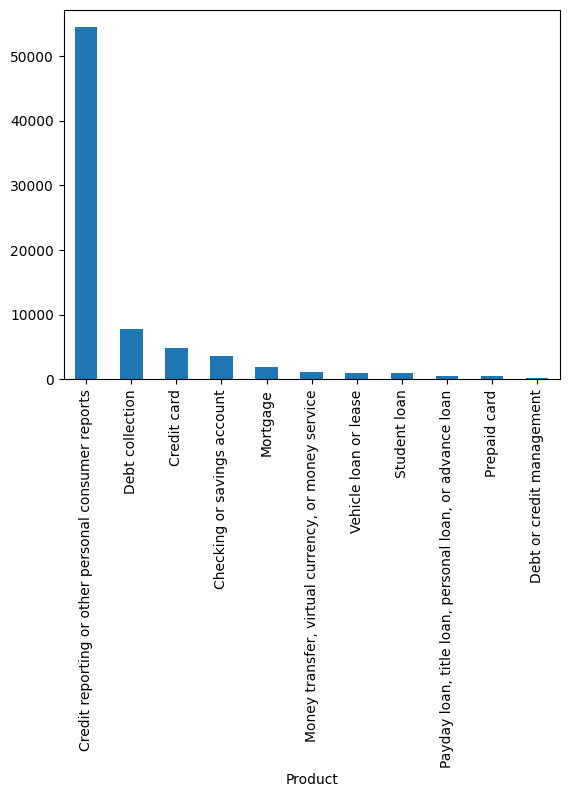

In [4]:
df['Product'].value_counts().plot(kind='bar')
plt.xlabel='Products'
plt.ylabel='Count'
plt.title='Distribution of Product'
plt.show()

In [5]:
products = df['Company'].nunique()
print(products)

1307


In [6]:
products = df['Company response to consumer'].unique()
print(products)

['Closed with explanation' 'Closed with non-monetary relief' 'In progress'
 'Closed with monetary relief' 'Untimely response']


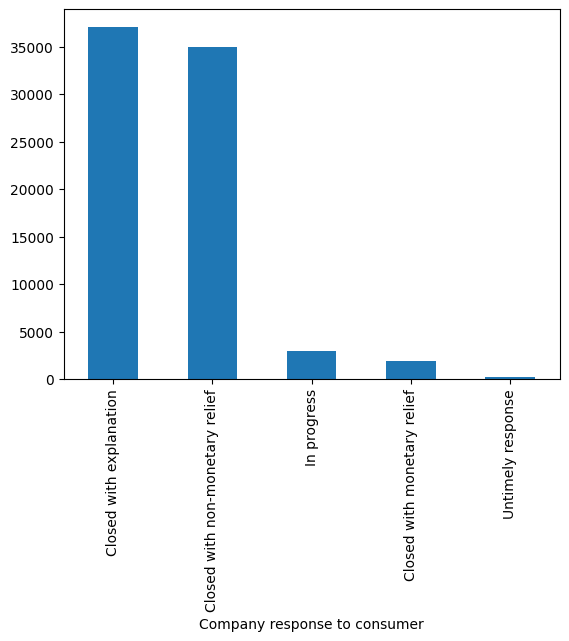

In [7]:
df['Company response to consumer'].value_counts().plot(kind='bar')
plt.xlabel='Company response to consumer'
plt.ylabel='Count'
plt.title='Distribution of Company response'
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77092 entries, 0 to 94678
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 73258 non-null  object 
 1   Product                       77092 non-null  object 
 2   Sub-product                   73252 non-null  object 
 3   Issue                         73283 non-null  object 
 4   Sub-issue                     71224 non-null  object 
 5   Consumer complaint narrative  73226 non-null  object 
 6   Company public response       46408 non-null  object 
 7   Company                       73172 non-null  object 
 8   State                         72859 non-null  object 
 9   ZIP code                      73244 non-null  object 
 10  Tags                          6286 non-null   object 
 11  Consumer consent provided?    73200 non-null  object 
 12  Submitted via                 73212 non-null  object 
 13  Date s

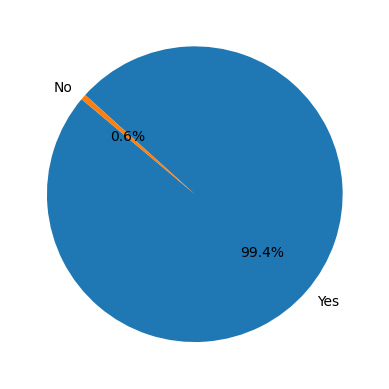

In [9]:
timely_response = df['Timely response?'].value_counts()
plt.pie(timely_response, labels=timely_response.index,autopct='%1.1f%%', startangle=140)
plt.show()

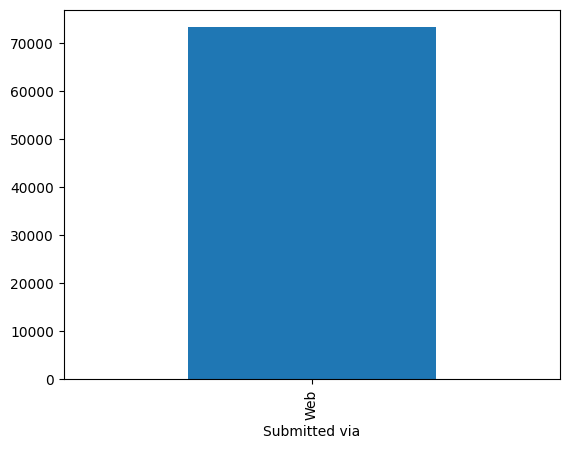

In [10]:
df['Submitted via'].value_counts().plot(kind='bar')
plt.xlabel='Submitted via'
plt.ylabel='Count'
plt.title='Distribution of Submitted via'
plt.show()

In [11]:
print(df['Company'].value_counts().head(10))

Company
TRANSUNION INTERMEDIATE HOLDINGS, INC.    22356
Experian Information Solutions Inc.       13566
EQUIFAX, INC.                             13519
CITIBANK, N.A.                             1311
WELLS FARGO & COMPANY                      1281
BANK OF AMERICA, NATIONAL ASSOCIATION      1079
CAPITAL ONE FINANCIAL CORPORATION           899
JPMORGAN CHASE & CO.                        898
SYNCHRONY FINANCIAL                         791
MOHELA                                      589
Name: count, dtype: int64


In [12]:
top_three_companies = df['Company'].value_counts().head(3).index.tolist()
print(top_three_companies)


['TRANSUNION INTERMEDIATE HOLDINGS, INC.', 'Experian Information Solutions Inc.', 'EQUIFAX, INC.']


In [13]:
df['Product'].value_counts()

Product
Credit reporting or other personal consumer reports        54416
Debt collection                                             7830
Credit card                                                 4917
Checking or savings account                                 3674
Mortgage                                                    1852
Money transfer, virtual currency, or money service          1172
Vehicle loan or lease                                       1065
Student loan                                                1027
Payday loan, title loan, personal loan, or advance loan      498
Prepaid card                                                 486
Debt or credit management                                    155
Name: count, dtype: int64

In [14]:
top_five_Product = df['Product'].value_counts().head(5).index.tolist()
print(top_five_Product)


['Credit reporting or other personal consumer reports', 'Debt collection', 'Credit card', 'Checking or savings account', 'Mortgage']


TypeError: 'str' object is not callable

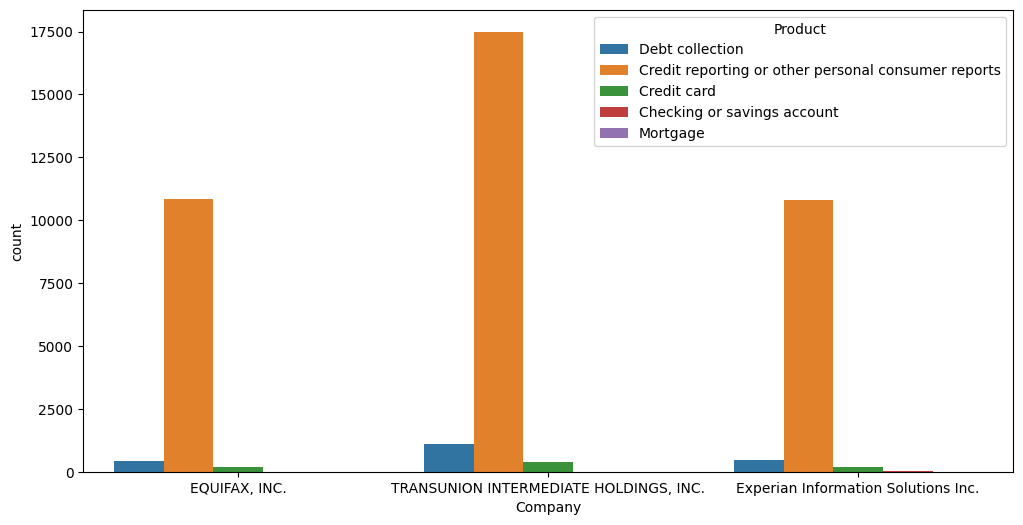

In [15]:
top_nine_states = df['State'].value_counts().head(20).index.tolist()
df_top = df[df['Product'].isin(top_five_Product) & df['Company'].isin(top_three_companies) & df['State'].isin(top_nine_states)]


plt.figure(figsize=(12, 6))
sns.countplot(x='Company', hue='Product', data=df_top)
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=140)
plt.show()

In [16]:
print(df['State'].value_counts().head(20))

State
TX    8938
FL    8799
CA    8083
GA    5728
NY    4136
IL    3984
PA    2937
NC    2817
NJ    2508
SC    1909
OH    1857
MD    1854
MI    1679
VA    1501
AZ    1283
LA    1263
TN    1247
IN     982
MO     980
NV     964
Name: count, dtype: int64


TypeError: 'str' object is not callable

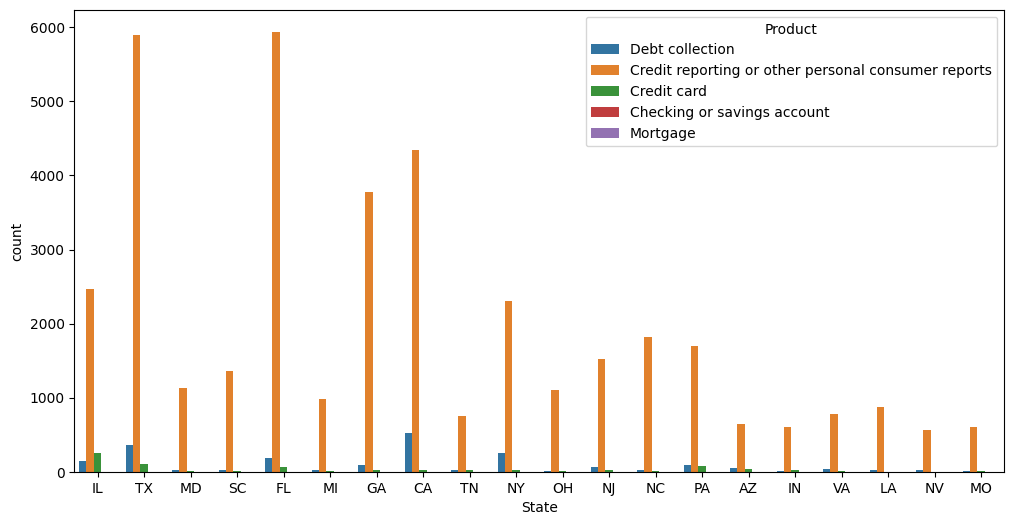

In [17]:
# Taking states with complaints above 2000.

plt.figure(figsize=(12, 6))
sns.countplot(x='State', hue='Product', data=df_top)
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=140)
plt.show()


TypeError: 'str' object is not callable

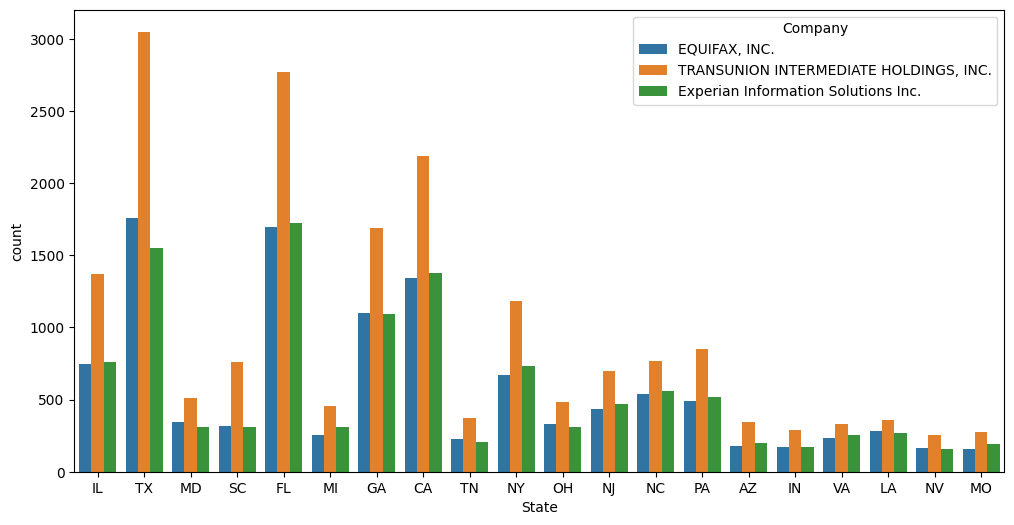

In [18]:

plt.figure(figsize=(12, 6))
sns.countplot(x='State', hue='Company', data=df_top)
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=140)
plt.show()

In [19]:
print(df['Company response to consumer'].value_counts().head(20))

Company response to consumer
Closed with explanation            37082
Closed with non-monetary relief    34940
In progress                         2918
Closed with monetary relief         1932
Untimely response                    220
Name: count, dtype: int64


TypeError: 'str' object is not callable

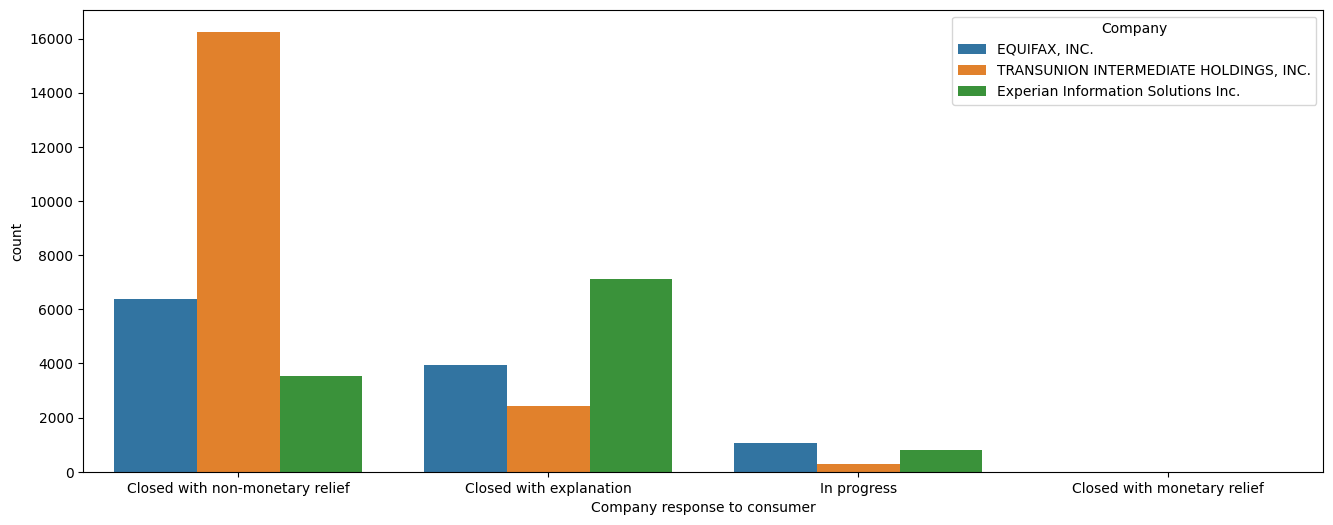

In [20]:

plt.figure(figsize=(16, 6))
sns.countplot(x='Company response to consumer', hue='Company', data=df_top)
plt.ylabel('Count')
plt.show()

TypeError: 'str' object is not callable

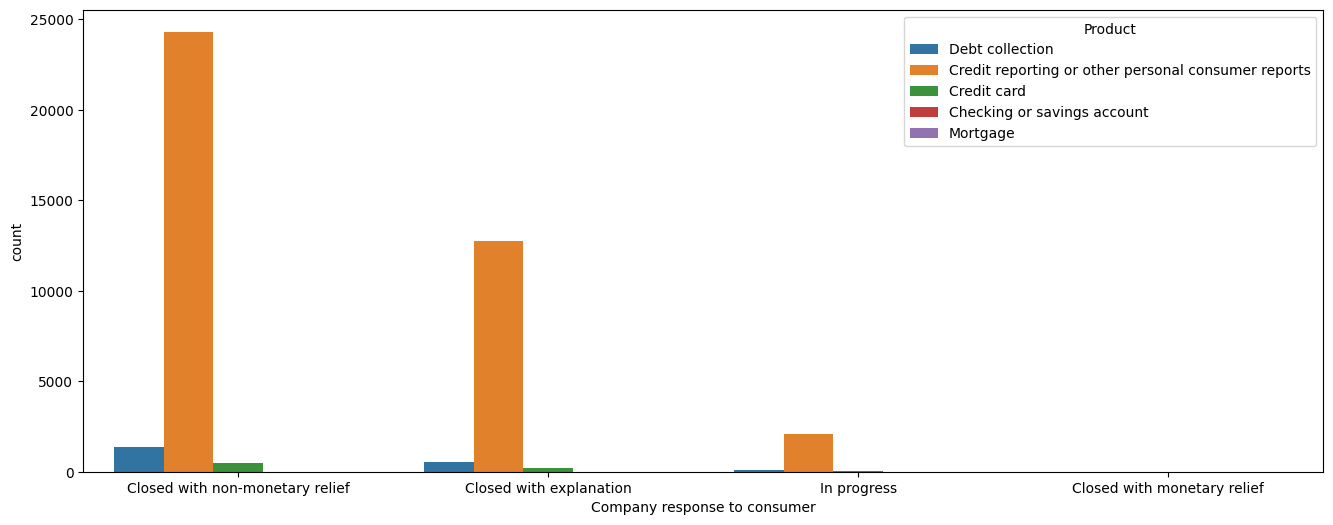

In [21]:

plt.figure(figsize=(16, 6))
sns.countplot(x='Company response to consumer', hue='Product', data=df_top)
plt.ylabel('Count') 
plt.show()

In [22]:
fig = px.scatter(df_top, x='State', y='Product', color='Company', hover_data=['Company'])
fig.update_layout(width=1000, height=600) 
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [23]:
print(df['Issue'].value_counts())
top_three_issues = df['Issue'].value_counts().head(3).index.tolist()
df_top = df[df['Product'].isin(top_five_Product) & df['Company'].isin(top_three_companies) & df['State'].isin(top_nine_states) & df['Issue'].isin(top_three_issues)]
print(top_three_issues)


Issue
Incorrect information on your report                               23308
Improper use of your report                                        15526
Problem with a company's investigation into an existing problem    13177
Attempts to collect debt not owed                                   3243
Written notification about debt                                     2626
                                                                   ...  
Vehicle was damaged or destroyed the vehicle                           2
Issue with income share agreement                                      1
Credit limit changed                                                   1
Lost or stolen refund                                                  1
Incorrect exchange rate                                                1
Name: count, Length: 83, dtype: int64
['Incorrect information on your report', 'Improper use of your report', "Problem with a company's investigation into an existing problem"]


TypeError: 'str' object is not callable

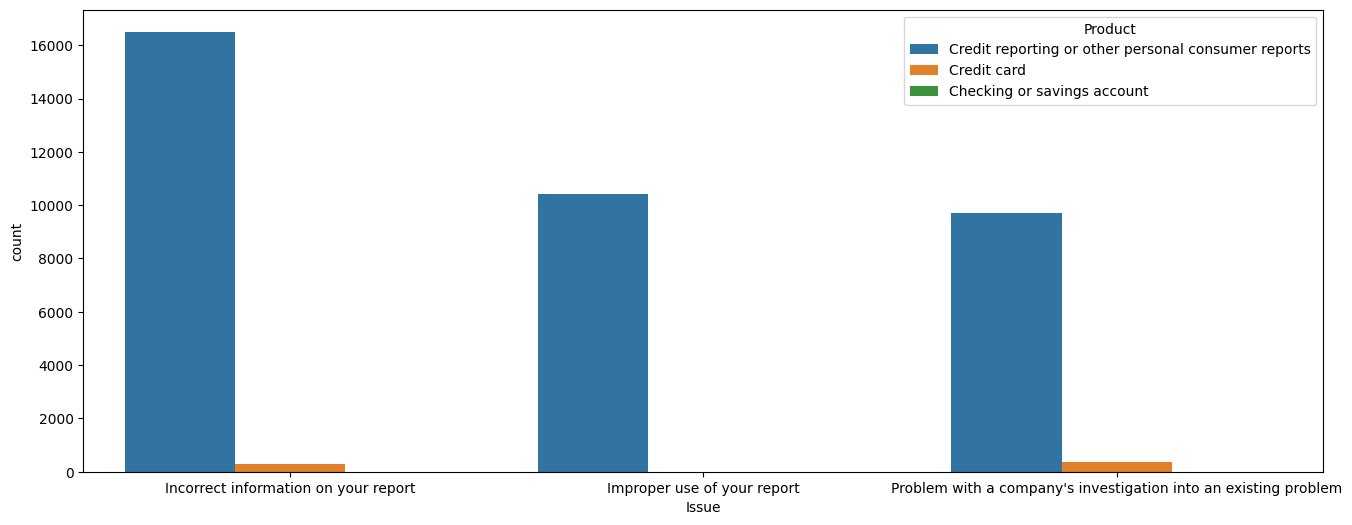

In [24]:
plt.figure(figsize=(16, 6))
df_top = df[df['Product'].isin(top_five_Product) & df['Company'].isin(top_three_companies) & df['State'].isin(top_nine_states) & df['Issue'].isin(top_three_issues)]

sns.countplot(x='Issue', hue='Product', data=df_top)
plt.ylabel('Count') 
plt.show()

In [ ]:
# Conclusion
#  1.Most complaints regarding the product: Credit reporting or other personal consumer reports
#          -> Majority of the issues related to this product: 1.Incorrect information on your report
#                                                             2.Improper use of your report
#                                                             3.Problem with a company's investigation into an existing problem
#  2. Most complaints against the following companies: 1.TRANSUNION INTERMEDIATE HOLDINGS, INC.
#                                                      2.Experian Information Solutions Inc.
#                                                      3.EQUIFAX, INC.
#  3. States with the highest number of complaints: 1.TX 3.CA
#                                                    2.FL 4.GA
#                                                         
#  4. Company with most number of complaints (Statewise):TRANSUNION INTERMEDIATE HOLDINGS, INC.

#  5. Company with most number of complaints (Productwise):TRANSUNION INTERMEDIATE HOLDINGS, INC.

#  6. Most complaints closed with explanation: Experian Information Solutions Inc.

#  7. Most complaints closed with non monetary relief:TRANSUNION INTERMEDIATE HOLDINGS, INC.

#   POSITIVE POINTS: 1. 99.4% of complaints are getting responses timely.
#                   2. Majority of the complaints are getting closed with either explanation or non monetary relief. 
#   
#   NEGATIVE POINTS: 1.Most issues are due to negligence regarding thier own reports.
#                    2.Issues regarding credit card and debt collection(they are among the top three complaints productwise) 
#                      can impact customer experience in a negative way.
#                      